###  目标

学习在金融分控领域常用的机器学习模型

学习机器学习模型的建模过程与调参流程

###  主要内容

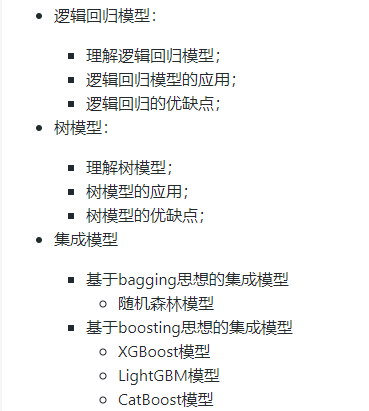

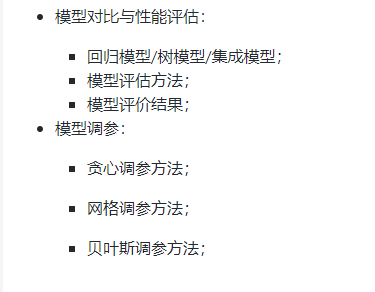

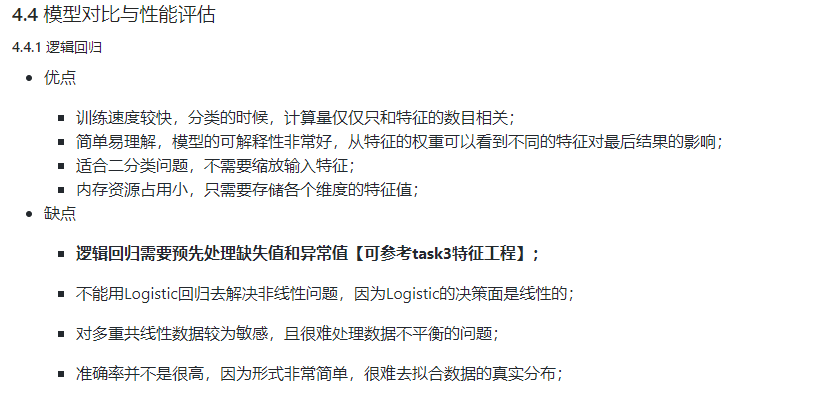

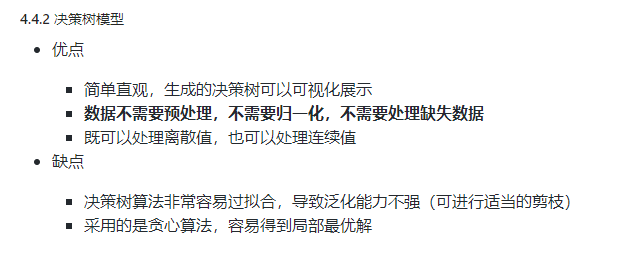

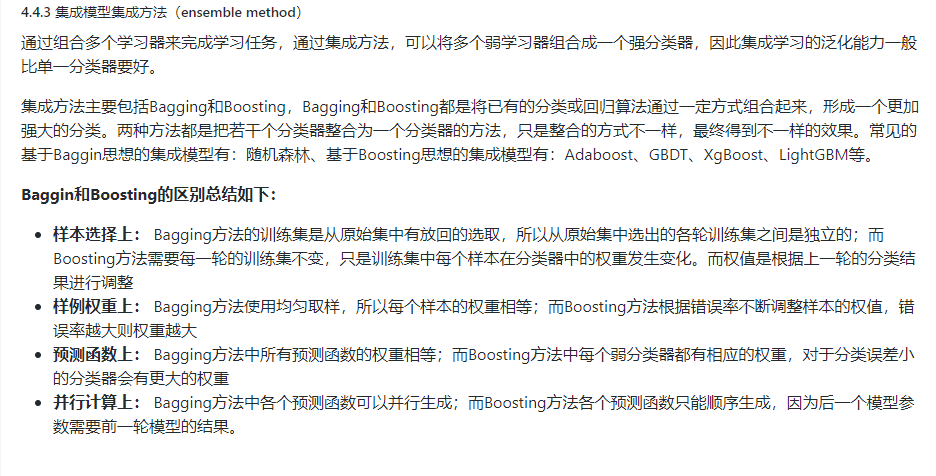

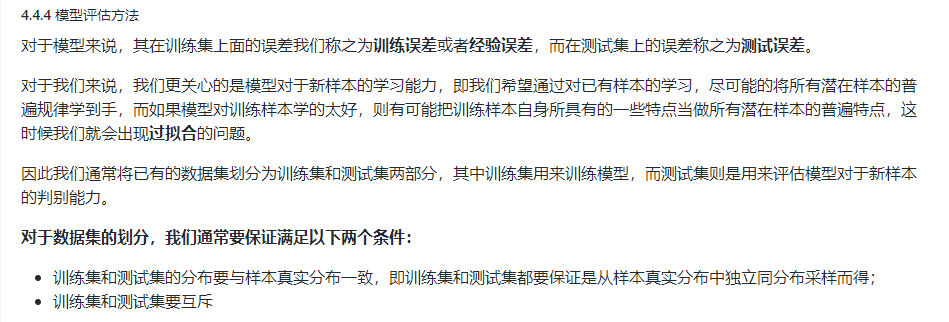

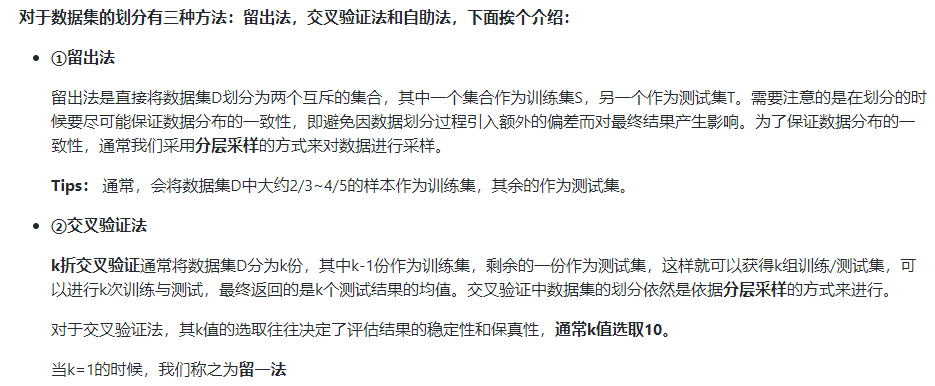

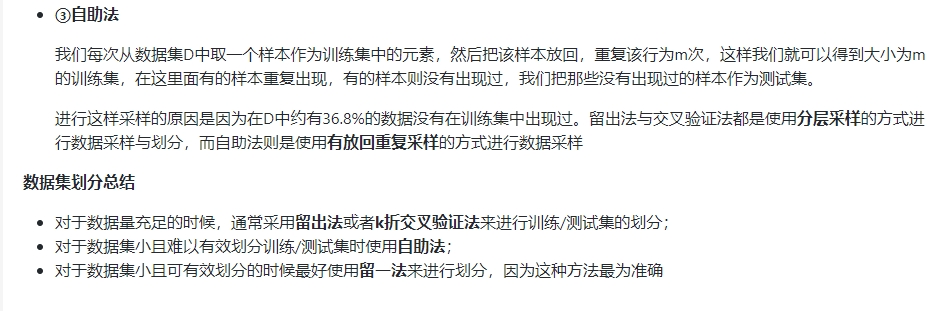

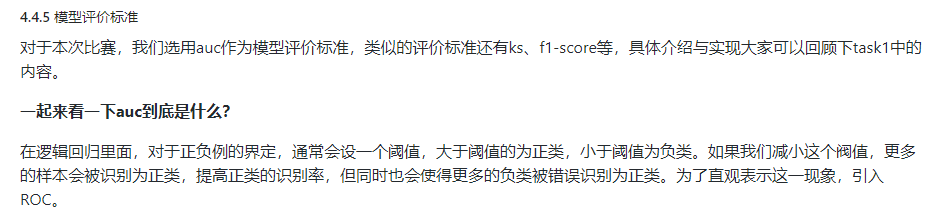

####  导入相关包和相关设置

In [1]:
import pandas as pd
import numpy as np
import warnings
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import roc_auc_score
"""
sns 相关设置
@return:
"""
# 声明使用 Seaborn 样式
sns.set()
# 有五种seaborn的绘图风格，它们分别是：darkgrid, whitegrid, dark, white, ticks。默认的主题是darkgrid。
sns.set_style("whitegrid")
# 有四个预置的环境，按大小从小到大排列分别为：paper, notebook, talk, poster。其中，notebook是默认的。
sns.set_context('talk')
# 中文字体设置-黑体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False
# 解决Seaborn中文显示问题并调整字体大小
sns.set(font='SimHei')

In [2]:
import pandas as pd
import numpy as np
import warnings
import os
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import  seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)    #显示所有列
pd.set_option('display.max_rows', 30)    #显示所有行
pd.set_option('max_colwidth',100)    #设置value的显示长度为100，默认为50

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [3]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron,PassiveAggressiveRegressor
from sklearn.linear_model import SGDClassifier,SGDRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor


from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import catboost as cat
from catboost import CatBoostRegressor

from sklearn.metrics import roc_auc_score

####  读取数据

In [4]:
X_train = pd.read_csv(r'D:\MyData\chenpf8\TianChi_Data\01_Introduction to Financial risk control - Loan default prediction\0927\x_train.csv',
                   encoding='UTF-8', header=0)
X_test = pd.read_csv(r'D:\MyData\chenpf8\TianChi_Data\01_Introduction to Financial risk control - Loan default prediction\0927\x_test.csv',
                   encoding='UTF-8', header=0)
y_train = pd.read_csv(r'D:\MyData\chenpf8\TianChi_Data\01_Introduction to Financial risk control - Loan default prediction\0927\y_train.csv',
                   encoding='UTF-8', header=0)

In [3]:
X_test.isnull().sum()
# X_train['employmentLength'].nunique()

loanAmnt                    0
term                        0
interestRate                0
installment                 0
grade                       0
subGrade                    0
employmentTitle             0
employmentLength        11742
homeOwnership               0
annualIncome                0
verificationStatus          0
purpose                     0
postCode                    0
regionCode                  0
dti                         0
delinquency_2years          0
ficoRangeLow                0
ficoRangeHigh               0
openAcc                     0
pubRec                      0
pubRecBankruptcies          0
revolBal                    0
revolUtil                   0
totalAcc                    0
initialListStatus           0
applicationType             0
earliesCreditLine           0
title                       0
policyCode                  0
n0                          0
n1                          0
n2                          0
n2.1                        0
n4        

In [6]:
X_train['employmentLength'].mode()[0]   

10.0

###  上一步中  要用  [0]  把数值取出来

In [5]:
X_train['employmentLength'] = X_train['employmentLength'].fillna(X_train['employmentLength'].mode()[0])
X_test['employmentLength'] = X_test['employmentLength'].fillna(X_test['employmentLength'].mode()[0])

In [5]:
X_test['employmentLength'].isnull().sum()

0

In [15]:
X_train.isnull().sum()

loanAmnt                0
term                    0
interestRate            0
installment             0
grade                   0
subGrade                0
employmentTitle         0
employmentLength        0
homeOwnership           0
annualIncome            0
verificationStatus      0
purpose                 0
postCode                0
regionCode              0
dti                     0
delinquency_2years      0
ficoRangeLow            0
ficoRangeHigh           0
openAcc                 0
pubRec                  0
pubRecBankruptcies      0
revolBal                0
revolUtil               0
totalAcc                0
initialListStatus       0
applicationType         0
earliesCreditLine       0
title                   0
policyCode              0
n0                      0
n1                      0
n2                      0
n2.1                    0
n4                      0
n5                      0
n6                      0
n7                      0
n8                      0
n9          

In [16]:
y_train

,isDefault
0,1
1,0
2,0
3,0
4,0
...,...
612737,1
612738,0
612739,1
612740,0


In [6]:
y_train = np.array(y_train).reshape(612742)
y_train = pd.Series(y_train)
y_train

0         1
1         0
2         0
3         0
4         0
         ..
612737    1
612738    0
612739    1
612740    0
612741    0
Length: 612742, dtype: int64

In [18]:
X_train.head()

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,...,n8,n9,n10,n11,n12,n13,n14,issueDateDT,grade_target_mean,subGrade_target_mean
0,35000.0,5,19.52,917.97,5,21,161280,2.0,2,110000.0,...,12.0,2.0,7.0,0.0,0.0,0.0,2.0,2587,0.386234,0.380444
1,18000.0,5,18.49,461.90,4,16,89538,5.0,0,46000.0,...,13.0,5.0,13.0,0.0,0.0,0.0,2.0,1888,0.304227,0.298190
2,12000.0,5,16.99,298.17,4,17,159367,8.0,0,74000.0,...,5.0,3.0,11.0,0.0,0.0,0.0,4.0,3044,0.304227,0.302541
3,2050.0,3,7.69,63.95,1,3,59830,9.0,0,35000.0,...,18.0,3.0,12.0,0.0,0.0,0.0,3.0,2679,0.059838,0.065532
4,11500.0,3,14.98,398.54,3,12,85242,1.0,1,30000.0,...,21.0,4.0,8.0,0.0,0.0,0.0,2.0,2406,0.224522,0.224686


In [19]:
X_test.head()

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,...,n8,n9,n10,n11,n12,n13,n14,issueDateDT,grade_target_mean,subGrade_target_mean
0,14000.0,3,10.99,458.28,2,7,226216,10.0,0,80000.0,...,19.0,6.0,17.0,0.0,0.0,1.0,3.0,2587,0.131210,0.128111
1,20000.0,5,14.65,472.14,3,14,218168,10.0,0,50000.0,...,9.0,3.0,5.0,0.0,0.0,2.0,2.0,2952,0.224522,0.262219
2,12000.0,3,19.99,445.91,4,18,102813,2.0,1,60000.0,...,6.0,4.0,12.0,0.0,0.0,0.0,7.0,3410,0.304227,0.325175
3,17500.0,5,14.31,410.02,3,13,220769,4.0,0,37000.0,...,14.0,2.0,10.0,0.0,0.0,0.0,3.0,2710,0.224522,0.251584
4,35000.0,3,17.09,1249.42,4,15,192707,0.0,1,80000.0,...,18.0,11.0,19.0,0.0,0.0,0.0,1.0,3775,0.304227,0.279444


In [7]:
from sklearn.model_selection import KFold
folds = 10
seed = 2020
kf = KFold(n_splits=folds, shuffle=True, random_state=seed)

In [9]:
"""对训练集数据进行划分，分成训练集和验证集，并进行相应的操作"""
from sklearn.model_selection import train_test_split
import lightgbm as lgb
# 数据集划分
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.1)
train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
valid_matrix = lgb.Dataset(X_val, label=y_val)

params = {
            'boosting_type': 'gbdt',
            'objective': 'binary',
            'learning_rate': 0.1,
            'metric': 'auc',
            'min_child_weight': 1e-3,
            'num_leaves': 31,
            'max_depth': -1,
            'reg_lambda': 0,
            'reg_alpha': 0,
            'feature_fraction': 1,
            'bagging_fraction': 1,
            'bagging_freq': 0,
            'seed': 2020,
            'nthread': 8,
            'silent': True,
            'verbose': -1,
}

"""使用训练集数据进行模型训练"""
model = lgb.train(params, train_set=train_matrix, valid_sets=valid_matrix, num_boost_round=20000, verbose_eval=1000, early_stopping_rounds=200)

Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[303]	valid_0's auc: 0.734381


####  对验证集进行预测

未调参前lightgbm单模型在验证集上的AUC：0.7343810109731281


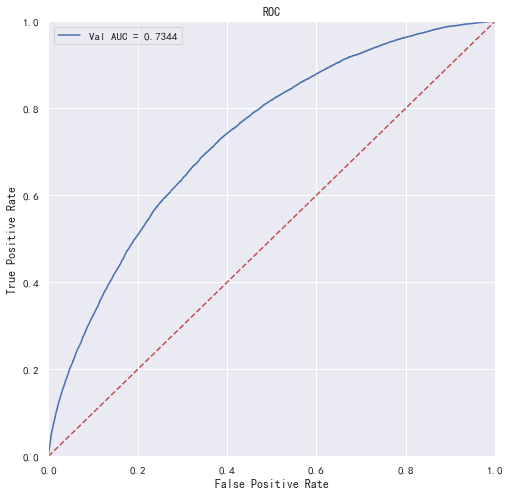

In [10]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

"""预测并计算roc的相关指标"""
val_pre_lgb = model.predict(X_val, num_iteration=model.best_iteration)
fpr, tpr, threshold = metrics.roc_curve(y_val,val_pre_lgb)
roc_auc = metrics.auc(fpr,tpr)

print('未调参前lightgbm单模型在验证集上的AUC：{}'.format(roc_auc))
"""画出roc曲线图"""
plt.figure(figsize=(8, 8))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.4f' % roc_auc)
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend(loc='best')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 画出对角线
plt.plot([0,1],[0,1],'r--')
plt.show()

In [9]:
X_train.index.name = 'id'
X_train.head()

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,...,n8,n9,n10,n11,n12,n13,n14,issueDateDT,grade_target_mean,subGrade_target_mean
id,,,,,,,,,,,,,,,,,,,,,
0,35000.0,5,19.52,917.97,5,21,161280,2.0,2,110000.0,...,12.0,2.0,7.0,0.0,0.0,0.0,2.0,2587,0.386234,0.380444
1,18000.0,5,18.49,461.90,4,16,89538,5.0,0,46000.0,...,13.0,5.0,13.0,0.0,0.0,0.0,2.0,1888,0.304227,0.298190
2,12000.0,5,16.99,298.17,4,17,159367,8.0,0,74000.0,...,5.0,3.0,11.0,0.0,0.0,0.0,4.0,3044,0.304227,0.302541
3,2050.0,3,7.69,63.95,1,3,59830,9.0,0,35000.0,...,18.0,3.0,12.0,0.0,0.0,0.0,3.0,2679,0.059838,0.065532
4,11500.0,3,14.98,398.54,3,12,85242,1.0,1,30000.0,...,21.0,4.0,8.0,0.0,0.0,0.0,2.0,2406,0.224522,0.224686


In [10]:
y_train.index.name = 'id'
y_train.head()

,isDefault
id,
0,1
1,0
2,0
3,0
4,0


####  更进一步的，使用5折交叉验证进行模型性能评估

In [11]:
import lightgbm as lgb

"""使用lightgbm 5折交叉验证进行建模预测"""
cv_scores = []
for i, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):
    print('************************************ {} ************************************'.format(str(i+1)))
    X_train_split, y_train_split, X_val, y_val = X_train.iloc[train_index], y_train.iloc[train_index], X_train.iloc[valid_index], y_train.iloc[valid_index]
    
    train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
    valid_matrix = lgb.Dataset(X_val, label=y_val)

    params = {
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'learning_rate': 0.1,
                'metric': 'auc',
                'min_child_weight': 1e-3,
                'num_leaves': 31,
                'max_depth': -1,
                'reg_lambda': 0,
                'reg_alpha': 0,
                'feature_fraction': 1,
                'bagging_fraction': 1,
                'bagging_freq': 0,
                'seed': 2020,
                'nthread': 8,
                'silent': True,
                'verbose': -1,
    }
    
    model = lgb.train(params, train_set=train_matrix, num_boost_round=20000, valid_sets=valid_matrix, verbose_eval=1000, early_stopping_rounds=200)
    val_pred = model.predict(X_val, num_iteration=model.best_iteration)
    
    cv_scores.append(roc_auc_score(y_val, val_pred))
    print(cv_scores)

print("lgb_scotrainre_list:{}".format(cv_scores))
print("lgb_score_mean:{}".format(np.mean(cv_scores)))
print("lgb_score_std:{}".format(np.std(cv_scores)))

************************************ 1 ************************************
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[509]	valid_0's auc: 0.727849
[0.7278491434019462]
************************************ 2 ************************************
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[271]	valid_0's auc: 0.732072
[0.7278491434019462, 0.732071725620201]
************************************ 3 ************************************
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[310]	valid_0's auc: 0.731419
[0.7278491434019462, 0.732071725620201, 0.7314193429228628]
************************************ 4 ************************************
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[429]	valid_0's auc: 0.731043
[0.7278491434019462, 0.732071725620201, 0.7314193429228628, 0.73104

###  模型调参

####  1. 贪心调参

先使用当前对模型影响最大的参数进行调优，达到当前参数下的模型最优化，再使用对模型影响次之的参数进行调优，如此下去，直到所有的参数调整完毕。
这个方法的缺点就是可能会调到局部最优而不是全局最优，但是只需要一步一步的进行参数最优化调试即可，容易理解。
需要注意的是在树模型中参数调整的顺序，也就是各个参数对模型的影响程度，这里列举一下日常调参过程中常用的参数和调参顺序

①：max_depth、num_leaves

②：min_data_in_leaf、min_child_weight

③：bagging_fraction、 feature_fraction、bagging_freq

④：reg_lambda、reg_alpha

⑤：min_split_gain

In [29]:
from sklearn.model_selection import cross_val_score

# 调objective
best_obj = dict()
for obj in objective:
    model = LGBMRegressor(objective=obj)
    """预测并计算roc的相关指标"""
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    best_obj[obj] = score
    
# num_leaves
best_leaves = dict()
for leaves in num_leaves:
    model = LGBMRegressor(objective=min(best_obj.items(), key=lambda x:x[1])[0], num_leaves=leaves)
    """预测并计算roc的相关指标"""
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    best_leaves[leaves] = score
    
# max_depth
best_depth = dict()
for depth in max_depth:
    model = LGBMRegressor(objective=min(best_obj.items(), key=lambda x:x[1])[0],
                          num_leaves=min(best_leaves.items(), key=lambda x:x[1])[0],
                          max_depth=depth)
    """预测并计算roc的相关指标"""
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    best_depth[depth] = score

"""
可依次将模型的参数通过上面的方式进行调整优化，并且通过可视化观察在每一个最优参数下模型的得分情况
"""

NameError: name 'objective' is not defined

####  2. 网格搜索

sklearn 提供GridSearchCV用于进行网格搜索，只需要把模型的参数输进去，就能给出最优化的结果和参数。相比起贪心调参，网格搜索的结果会更优，但是网格搜索只适合于小数据集，一旦数据的量级上去了，很难得出结果。

同样以Lightgbm算法为例，进行网格搜索调参：

In [13]:
"""通过网格搜索确定最优参数"""

from sklearn.model_selection import StratifiedKFold,KFold

from sklearn.model_selection import GridSearchCV

def get_best_cv_params(learning_rate=0.1, n_estimators=581, num_leaves=31, max_depth=-1, bagging_fraction=1.0, 
                       feature_fraction=1.0, bagging_freq=0, min_data_in_leaf=20, min_child_weight=0.001, 
                       min_split_gain=0, reg_lambda=0, reg_alpha=0, param_grid=None):
    # 设置5折交叉验证
    cv_fold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True, )
    
    model_lgb = lgb.LGBMClassifier(learning_rate=learning_rate,
                                   n_estimators=n_estimators,
                                   num_leaves=num_leaves,
                                   max_depth=max_depth,
                                   bagging_fraction=bagging_fraction,
                                   feature_fraction=feature_fraction,
                                   bagging_freq=bagging_freq,
                                   min_data_in_leaf=min_data_in_leaf,
                                   min_child_weight=min_child_weight,
                                   min_split_gain=min_split_gain,
                                   reg_lambda=reg_lambda,
                                   reg_alpha=reg_alpha,
                                   n_jobs= 8
                                  )
    grid_search = GridSearchCV(estimator=model_lgb, 
                               cv=cv_fold,
                               param_grid=param_grid,
                               scoring='roc_auc'
                              )
    grid_search.fit(X_train, y_train)

    print('模型当前最优参数为:{}'.format(grid_search.best_params_))
    print('模型当前最优得分为:{}'.format(grid_search.best_score_))

In [ ]:
# 需要注意一下的是，除了获取上面的获取num_boost_round时候用的是原生的lightgbm（因为要用自带的cv）
# 下面配合GridSearchCV时必须使用sklearn接口的lightgbm。

"""设置n_estimators 为581，调整num_leaves和max_depth，这里选择先粗调再细调"""

lgb_params = {'num_leaves': range(10, 80, 5), 'max_depth': range(3,10,2)}
get_best_cv_params(learning_rate=0.1, n_estimators=581, num_leaves=None, max_depth=None, min_data_in_leaf=20, 
                   min_child_weight=0.001,bagging_fraction=1.0, feature_fraction=1.0, bagging_freq=0, 
                   min_split_gain=0, reg_lambda=0, reg_alpha=0, param_grid=lgb_params)

D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MySoftware\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
"""
参数确定好了以后，我们设置一个比较小的learning_rate 0.005，来确定最终的num_boost_round
"""
# 设置5折交叉验证
# cv_fold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True, )
final_params = {
                'boosting_type': 'gbdt',
                'learning_rate': 0.01,
                'num_leaves': 29,
                'max_depth': 7,
                'min_data_in_leaf':45,
                'min_child_weight':0.001,
                'bagging_fraction': 0.9,
                'feature_fraction': 0.9,
                'bagging_freq': 40,
                'min_split_gain': 0,
                'reg_lambda':0,
                'reg_alpha':0,
                'nthread': 6
               }

cv_result = lgb.cv(train_set=lgb_train,
                   early_stopping_rounds=20,
                   num_boost_round=5000,
                   nfold=5,
                   stratified=True,
                   shuffle=True,
                   params=final_params,
                   metrics='auc',
                   seed=0,
                  )

print('迭代次数{}'.format(len(cv_result['auc-mean'])))
print('交叉验证的AUC为{}'.format(max(cv_result['auc-mean'])))

NameError: name 'lgb_train' is not defined

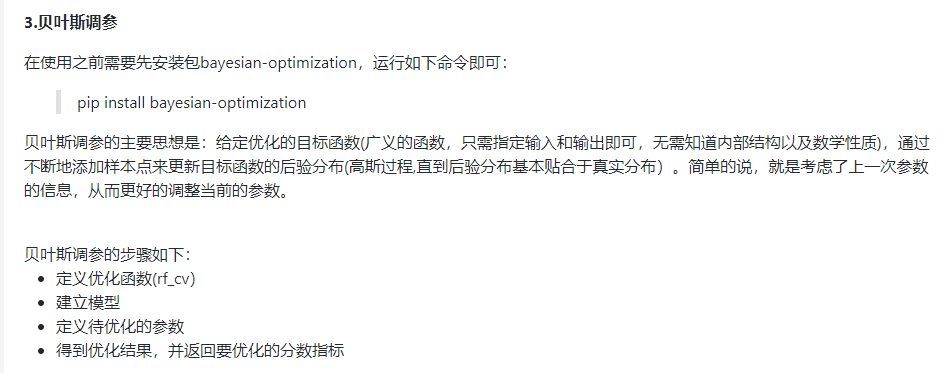

In [12]:
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import catboost as cat

In [14]:
from sklearn.model_selection import cross_val_score

"""定义LGB优化函数"""
def rf_cv_lgb(num_leaves, max_depth, bagging_fraction, feature_fraction, bagging_freq, min_data_in_leaf, 
              min_child_weight, min_split_gain, reg_lambda, reg_alpha):
    # 建立模型
    model_lgb = lgb.LGBMClassifier(boosting_type='gbdt', bjective='binary', metric='auc',
                                   learning_rate=0.1, n_estimators=5000,
                                   num_leaves=int(num_leaves), max_depth=int(max_depth), 
                                   bagging_fraction=round(bagging_fraction, 2), feature_fraction=round(feature_fraction, 2),
                                   bagging_freq=int(bagging_freq), min_data_in_leaf=int(min_data_in_leaf),
                                   min_child_weight=min_child_weight, min_split_gain=min_split_gain,
                                   reg_lambda=reg_lambda, reg_alpha=reg_alpha,
                                   n_jobs= 8
                                  )
    
    val = cross_val_score(model_lgb, X_train_split, y_train_split, cv=10, scoring='roc_auc').mean()
    
    return val

In [19]:
from sklearn.model_selection import cross_val_score

"""定义XGB优化函数"""
def rf_cv_xgb(gamma, min_child_weight, max_depth, subsample, colsample_bytree, 
              colsample_bylevel, reg_alpha, reg_lambda,eta):
    # 建立模型
    model_xgb = xgb.XGBClassifier(boosting_type='gbdt', bjective='binary', metric='auc',
                                  learning_rate=0.1, eta = round(eta,2),
                                  n_estimators=5000,n_jobs = -1,
                                  gamma=gamma, min_child_weight=round(min_child_weight, 2), 
                                  max_depth = int(max_depth),
                                  subsample = round(subsample, 2), colsample_bytree = round(colsample_bytree, 2),
                                  colsample_bylevel = round(colsample_bylevel, 2),
                                  reg_alpha = round(reg_alpha, 2),
                                  reg_lambda = round(reg_lambda, 2)
                                 )
    
    val = cross_val_score(model_xgb, X_train_split, y_train_split, cv=10, scoring='roc_auc').mean()
    
    return val

In [ ]:
params = {'learning_rate': 0.05, 'depth': 5, 'l2_leaf_reg': 10, 
                      'od_type': 'Iter', 'od_wait': 50,  'allow_writing_files': False}

In [16]:
from sklearn.model_selection import cross_val_score

"""定义CAT优化函数"""
def rf_cv_cat(depth, l2_leaf_reg, 
               od_wait):
    # 建立模型
    model_cat = cat.CatBoostClassifier(
                                  learning_rate = 0.05, 
                                  n_estimators=5000,
                                  depth = int(depth),bootstrap_type='Bernoulli',
                                  od_type = 'Iter',
                                  od_wait = int(od_wait),
                                  random_seed = 11,
                                  l2_leaf_reg = int(l2_leaf_reg),
                                  allow_writing_files = False
                                 )
    
    val = cross_val_score(model_cat, X_train_split, y_train_split, cv=10, scoring='roc_auc').mean()
    
    return val


In [ ]:
from bayes_opt import BayesianOptimization
"""定义优化参数"""
bayes_cat = BayesianOptimization(
            rf_cv_cat,
            {
        'depth':(1, 10),
        'l2_leaf_reg':(1, 20),
        'od_wait':(10,100)
            }
            )
 
"""开始优化"""
bayes_cat.maximize(n_iter=10)

In [21]:
from bayes_opt import BayesianOptimization
"""定义优化参数"""
bayes_xgb = BayesianOptimization(
            rf_cv_xgb,
            {
        'gamma':(0.1, 10),
        'eta':(0.01,0.5),
        'min_child_weight':(1, 20),
        'max_depth':(1, 10),
        'subsample':(0.1, 1),
        'colsample_bytree':(0.1, 1),
        'colsample_bylevel':(0.1,1),
        'reg_alpha':(0.1,10),
        'reg_lambda':(0.1,10)
            }
            )
 
"""开始优化"""
bayes_xgb.maximize(n_iter=10)


|   iter    |  target   | colsam... | colsam... |    eta    |   gamma   | max_depth | min_ch... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[16:07:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bjective, boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:32:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bjective, boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used 

[21:51:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bjective, boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  2        |  0.7323   |  0.7123   |  0.3932   |  0.05461  |  0.2988   |  2.514    |  13.31    |  3.516    |  9.223    |  0.6588   |
[22:02:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bjective, boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:11:48] WARNING: C:\Users\Administrator\works

[01:24:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bjective, boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:36:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bjective, boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  4        |  0.7332   |  0.24     |  0.6802   |  0.05636  |  3.986    |  4.482    |  1.197    |  8.266    |  7.835    |  0.9807   |
[01:49:03] WARNING: C:\Users\Administrator\works

[16:20:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bjective, boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:29:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bjective, boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:39:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bjective, boosting_type, metric } might not be used.

  This may n

[19:27:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bjective, boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:39:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bjective, boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:49:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bjective, boosting_type, metric } might not be used.

  This may n

[22:27:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bjective, boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:38:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bjective, boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:50:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bjective, boosting_type, metric } might not be used.

  This may n

[01:32:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bjective, boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:42:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bjective, boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:53:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bjective, boosting_type, metric } might not be used.

  This may n

[10:18:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bjective, boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:26:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bjective, boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:34:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bjective, boosting_type, metric } might not be used.

  This may n

###  2020.10.07  优化所得 xgb_model最优参数

In [22]:
bayes_xgb.max

{'target': 0.7332000546326115,
 'params': {'colsample_bylevel': 0.24004646421891082,
  'colsample_bytree': 0.6802184102236292,
  'eta': 0.056360210787999444,
  'gamma': 3.986039595706467,
  'max_depth': 4.481869078402011,
  'min_child_weight': 1.1965956112115121,
  'reg_alpha': 8.266063391568002,
  'reg_lambda': 7.835289307133606,
  'subsample': 0.9806789621540217}}

###  2020.10.05  优化所得cat_model最优参数

In [18]:
bayes_cat.max

{'target': 0.7301774380344502,
 'params': {'depth': 2.3174615032112014,
  'l2_leaf_reg': 18.55111059409566,
  'od_wait': 50.12183338126141}}

In [56]:
print(X_train.isinfinity ().any().sum())
print(X_test.isinfinity ().any().sum())
print(y_train.isinfinity ().any().sum())

AttributeError: 'DataFrame' object has no attribute 'isinfinity'

In [67]:
y_train

0         1
1         0
2         0
3         0
4         0
         ..
612737    1
612738    0
612739    1
612740    0
612741    0
Length: 612742, dtype: int64

In [62]:
print(X_train.max().max())
print(X_test.max().max())
print(y_train.max())

282586.0
9500000.0
1


In [17]:
from bayes_opt import BayesianOptimization
"""定义优化参数"""
bayes_lgb = BayesianOptimization(
    rf_cv_lgb, 
    {
        'num_leaves':(10, 200),
        'max_depth':(3, 20),
        'bagging_fraction':(0.5, 1.0),
        'feature_fraction':(0.5, 1.0),
        'bagging_freq':(0, 100),
        'min_data_in_leaf':(10,100),
        'min_child_weight':(0, 10),
        'min_split_gain':(0.0, 1.0),
        'reg_alpha':(0.0, 10),
        'reg_lambda':(0.0, 10)
    }
)

"""开始优化"""
bayes_lgb.maximize(n_iter=10)

|   iter    |  target   | baggin... | baggin... | featur... | max_depth | min_ch... | min_da... | min_sp... | num_le... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.6918   |  0.5439   |  40.52    |  0.8027   |  8.638    |  5.288    |  93.4     |  0.1313   |  178.7    |  1.435    |  2.231    |
|  2        |  0.7265   |  0.784    |  41.17    |  0.9397   |  8.962    |  2.702    |  55.89    |  0.4028   |  16.08    |  7.452    |  1.478    |
|  3        |  0.7115   |  0.6614   |  26.14    |  0.8101   |  9.316    |  2.071    |  90.7     |  0.3307   |  152.7    |  5.096    |  6.796    |
|  4        |  0.7186   |  0.7576   |  82.03    |  0.6925   |  7.491    |  0.8701   |  74.79    |  0.1576   |  196.6    |  3.615    |  7.129    |
|  5        |  0.6955   |  0.599    |  5.207    |  0.5619   |  11.41    |  5.292    |  11.15    |  0.2582   |  106.8    |  3

In [18]:
"""显示优化结果"""

#  2020.09.30  结果

bayes_lgb.max

{'target': 0.7316023677054767,
 'params': {'bagging_fraction': 0.9596590561177885,
  'bagging_freq': 51.66669494248652,
  'feature_fraction': 0.7011329299511873,
  'max_depth': 19.287354652584416,
  'min_child_weight': 0.4251947071723561,
  'min_data_in_leaf': 51.405280594258315,
  'min_split_gain': 0.38075588139043426,
  'num_leaves': 40.085183057175946,
  'reg_alpha': 9.236351207722521,
  'reg_lambda': 9.997056978112075}}

In [17]:
"""显示优化结果"""
bayes_lgb.max

{'target': 0.7304665266720419,
 'params': {'bagging_fraction': 0.9758421369426026,
  'bagging_freq': 75.42939079423962,
  'feature_fraction': 0.6132597470939336,
  'max_depth': 4.169901823898698,
  'min_child_weight': 8.613109177508512,
  'min_data_in_leaf': 24.961467458292066,
  'min_split_gain': 0.9407686668430372,
  'num_leaves': 105.6416192027432,
  'reg_alpha': 0.9423320491226983,
  'reg_lambda': 4.132017856692731}}

In [19]:
"""调整一个较小的学习率，并通过cv函数确定当前最优的迭代次数"""
base_params_lgb = {
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'learning_rate': 0.01,
                    'num_leaves': 40,
                    'max_depth': 19,
                    'min_data_in_leaf': 51,
                    'min_child_weight': 0.43,
                    'bagging_fraction': 0.96,
                    'feature_fraction': 0.70,
                    'bagging_freq': 51,
                    'reg_lambda': 10,
                    'reg_alpha': 9,
                    'min_split_gain': 0.38,
                    'nthread': 8,
                    'seed': 2020,
                    'silent': True,
                    'verbose': -1,
}

cv_result_lgb = lgb.cv(
    train_set=train_matrix,
    early_stopping_rounds=1000, 
    num_boost_round=20000,
    nfold=5,
    stratified=True,
    shuffle=True,
    params=base_params_lgb,
    metrics='auc',
    seed=0
)

print('迭代次数{}'.format(len(cv_result_lgb['auc-mean'])))
print('最终模型的AUC为{}'.format(max(cv_result_lgb['auc-mean'])))

迭代次数5459
最终模型的AUC为0.7327585831394574


In [20]:
import lightgbm as lgb
"""使用lightgbm 5折交叉验证进行建模预测"""
cv_scores = []
for i, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):
    print('************************************ {} ************************************'.format(str(i+1)))
    X_train_split, y_train_split, X_val, y_val = X_train.iloc[train_index], y_train.iloc[train_index], X_train.iloc[valid_index], y_train.iloc[valid_index]
    
    train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
    valid_matrix = lgb.Dataset(X_val, label=y_val)

    params = {
                'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'learning_rate': 0.01,
                    'num_leaves': 40,
                    'max_depth': 19,
                    'min_data_in_leaf': 51,
                    'min_child_weight': 0.43,
                    'bagging_fraction': 0.96,
                    'feature_fraction': 0.70,
                    'bagging_freq': 51,
                    'reg_lambda': 10,
                    'reg_alpha': 9,
                    'min_split_gain': 0.38,
                    'nthread': 8,
                    'seed': 2020,
                    'silent': True,
                    'verbose': -1
    }
    
    model = lgb.train(params, train_set=train_matrix, num_boost_round=14269, valid_sets=valid_matrix, verbose_eval=1000, early_stopping_rounds=200)
    val_pred = model.predict(X_val, num_iteration=model.best_iteration)
    
    cv_scores.append(roc_auc_score(y_val, val_pred))
    print(cv_scores)

print("lgb_scotrainre_list:{}".format(cv_scores))
print("lgb_score_mean:{}".format(np.mean(cv_scores)))
print("lgb_score_std:{}".format(np.std(cv_scores)))

************************************ 1 ************************************
Training until validation scores don't improve for 200 rounds
[1000]	valid_0's auc: 0.728517
[2000]	valid_0's auc: 0.731064
[3000]	valid_0's auc: 0.73184
Early stopping, best iteration is:
[3622]	valid_0's auc: 0.732124
[0.7321242600902969]
************************************ 2 ************************************
Training until validation scores don't improve for 200 rounds
[1000]	valid_0's auc: 0.730909
[2000]	valid_0's auc: 0.73305
[3000]	valid_0's auc: 0.733638
[4000]	valid_0's auc: 0.733956
Early stopping, best iteration is:
[4034]	valid_0's auc: 0.733977
[0.7321242600902969, 0.7339772125785085]
************************************ 3 ************************************
Training until validation scores don't improve for 200 rounds
[1000]	valid_0's auc: 0.731396
[2000]	valid_0's auc: 0.734266
[3000]	valid_0's auc: 0.73525
[4000]	valid_0's auc: 0.735902
[5000]	valid_0's auc: 0.736183
[6000]	valid_0's auc: 0

通过5折交叉验证可以发现，模型迭代次数在6000次的时候会停之，那么我们在建立新模型时直接设置最大迭代次数，并使用验证集进行模型预测

Training until validation scores don't improve for 200 rounds
[1000]	valid_0's auc: 0.727312
[2000]	valid_0's auc: 0.730859
[3000]	valid_0's auc: 0.732379
[4000]	valid_0's auc: 0.733394
[5000]	valid_0's auc: 0.733833
Early stopping, best iteration is:
[5385]	valid_0's auc: 0.734026
调参后lightgbm单模型在验证集上的AUC：0.7340261946685176


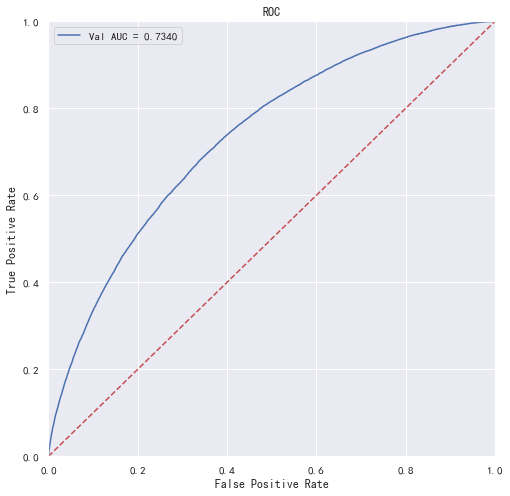

In [21]:
base_params_lgb = {
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'metric': 'auc',
                'learning_rate': 0.01,
                'num_leaves': 105,
                'max_depth': 4,
                'min_data_in_leaf': 25,
                'min_child_weight': 8.6,
                'bagging_fraction': 0.98,
                'feature_fraction': 0.61,
                'bagging_freq': 75,
                'reg_lambda': 4,
                'reg_alpha': 1,
                'min_split_gain': 0.9,
                'nthread': 8,
                'seed': 2020,
                'silent': True,
    }

"""使用训练集数据进行模型训练"""
final_model_lgb = lgb.train(base_params_lgb, train_set=train_matrix, valid_sets=valid_matrix, num_boost_round=6000, verbose_eval=1000, early_stopping_rounds=200)

"""预测并计算roc的相关指标"""
val_pre_lgb = final_model_lgb.predict(X_val)
fpr, tpr, threshold = metrics.roc_curve(y_val, val_pre_lgb)
roc_auc = metrics.auc(fpr, tpr)
print('调参后lightgbm单模型在验证集上的AUC：{}'.format(roc_auc))
"""画出roc曲线图"""
plt.figure(figsize=(8, 8))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.4f' % roc_auc)
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend(loc='best')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 画出对角线
plt.plot([0,1],[0,1],'r--')
plt.show()

In [22]:
# X_test
y_pre_lgb = final_model_lgb.predict(X_test)
y_pre_lgb

array([0.07515198, 0.37047814, 0.56650388, ..., 0.20564263, 0.24509221,
       0.02869685])

In [23]:
sub = pd.DataFrame()
sub['id'] = X_test.index
sub['isDefault'] = y_pre_lgb
sub.to_csv('submission_lgbr_0927.csv',index=False)

In [25]:
"""保存模型到本地"""
# 保存模型
import pickle
pickle.dump(final_model_lgb, open('dataset/model_lgb_best.pkl', 'wb'))

In [37]:
from catboost import CatBoostClassifier

In [52]:
"""使用lightgbm 5折交叉验证进行建模预测"""
from sklearn.model_selection import KFold
folds = 5
seed = 2020
kf = KFold(n_splits=folds, shuffle=True, random_state=seed)

cv_scores = []
for i, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):
    print('************************************ {} ************************************'.format(str(i+1)))
    X_train_split, y_train_split, X_val, y_val = X_train.iloc[train_index], y_train.iloc[train_index], X_train.iloc[valid_index], y_train.iloc[valid_index]
    
#     train_matrix = cat.Dataset(X_train_split, label=y_train_split)
#     valid_matrix = cat.Dataset(X_val, label=y_val)

    params = {
#                 'n_estimators':5000,
                'learning_rate': 0.05,
                'eval_metric':'AUC',
                'bootstrap_type': 'Bernoulli',
                'l2_leaf_reg': 10,
                'random_seed':2020,
                'od_type': 'Iter',
                'od_wait':50,
                'depth': 5,
                'allow_writing_files': False
                #'colsample_bylevel':0.7,
                }

    model = CatBoostRegressor(iterations=20000,**params)
    model.fit(X_train_split,y_train_split,eval_set=(X_val, y_val),cat_features=[], use_best_model=True, verbose=500)
    val_pred = model.predict(X_val)
    
    cv_scores.append(roc_auc_score(y_val, val_pred))
    print(cv_scores)

print("cat_scotrainre_list:{}".format(cv_scores))
print("cat_score_mean:{}".format(np.mean(cv_scores)))
print("cat_score_std:{}".format(np.std(cv_scores)))

************************************ 1 ************************************
0:	test: 0.6900038	best: 0.6900038 (0)	total: 45.2ms	remaining: 15m 4s
500:	test: 0.7268506	best: 0.7268506 (500)	total: 24.2s	remaining: 15m 40s
1000:	test: 0.7296661	best: 0.7296661 (1000)	total: 50.2s	remaining: 15m 52s
1500:	test: 0.7309325	best: 0.7309325 (1500)	total: 1m 16s	remaining: 15m 40s
2000:	test: 0.7314321	best: 0.7314478 (1980)	total: 1m 42s	remaining: 15m 21s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7317767659
bestIteration = 2403

Shrink model to first 2404 iterations.
[0.7317767658989276]
************************************ 2 ************************************
0:	test: 0.6904418	best: 0.6904418 (0)	total: 56.4ms	remaining: 18m 48s
500:	test: 0.7287523	best: 0.7287523 (500)	total: 27.4s	remaining: 17m 48s
1000:	test: 0.7310009	best: 0.7310009 (1000)	total: 54.5s	remaining: 17m 14s
1500:	test: 0.7320456	best: 0.7320473 (1477)	total: 1m 22s	remaining: 16m 53s
2000:	

In [19]:
cat.train??

In [24]:
tuple( [X_train_split , y_train_split])[0]

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,...,n8,n9,n10,n11,n12,n13,n14,issueDateDT,grade_target_mean,subGrade_target_mean
0,35000.0,5,19.52,917.97,5,21,161280,2.0,2,110000.0,...,12.0,2.0,7.0,0.0,0.0,0.0,2.0,2587,0.386234,0.380444
1,18000.0,5,18.49,461.90,4,16,89538,5.0,0,46000.0,...,13.0,5.0,13.0,0.0,0.0,0.0,2.0,1888,0.304227,0.298190
2,12000.0,5,16.99,298.17,4,17,159367,8.0,0,74000.0,...,5.0,3.0,11.0,0.0,0.0,0.0,4.0,3044,0.304227,0.302541
3,2050.0,3,7.69,63.95,1,3,59830,9.0,0,35000.0,...,18.0,3.0,12.0,0.0,0.0,0.0,3.0,2679,0.059838,0.065532
4,11500.0,3,14.98,398.54,3,12,85242,1.0,1,30000.0,...,21.0,4.0,8.0,0.0,0.0,0.0,2.0,2406,0.224522,0.224686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612735,3000.0,3,14.65,103.49,3,14,212874,NaN,0,56000.0,...,23.0,9.0,13.0,0.0,0.0,0.0,5.0,3044,0.224522,0.262219
612736,24000.0,3,5.32,722.76,1,0,26602,2.0,1,72000.0,...,7.0,2.0,9.0,0.0,0.0,0.0,1.0,3227,0.059838,0.032617
612737,15000.0,5,19.52,393.42,5,21,142989,7.0,0,60000.0,...,12.0,4.0,9.0,0.0,0.0,0.0,6.0,2679,0.386234,0.380444
612739,6000.0,3,13.33,203.12,3,12,119990,10.0,1,65000.0,...,10.0,4.0,5.0,0.0,0.0,1.0,4.0,3044,0.224522,0.224686


In [28]:
y_train_split.head()

0    1
1    0
2    0
3    0
4    0
dtype: int64

In [29]:
(1,2,3)

(1, 2, 3)